## Diabeties Dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, feature_selection
from sklearn.metrics import mean_squared_error, r2_score

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)
print(diabetes_y.shape)
print(diabetes_X.dtype)
print(diabetes_y.dtype)

(442, 10)
(442,)
float64
float64


In [22]:
#print(diabetes_X[0,:])
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
print(X.head)
print(y.head)

<bound method NDFrame.head of           age       sex       bmi        bp        s1        s2        s3   
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.00

In [28]:
selector = feature_selection.VarianceThreshold()
results = selector.fit_transform(diabetes_X)
print(results.var())
print(0 in results)

0.0022624434389140274
False


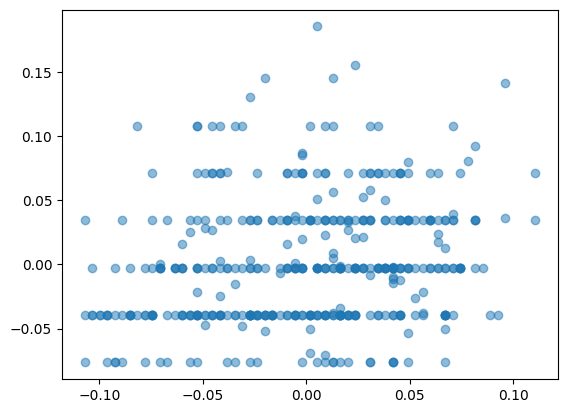

In [16]:
#Explore the data
#draw scatter plot to observe relation between total cholesterol / HDL and age
x_age = diabetes_X[:,0]
x_ch = diabetes_X[:,7]
plt.scatter(x_age, x_ch, alpha=0.5)
plt.show()

In [17]:

#get bmi index feature vector
diabetes_Xbmi = diabetes_X[:, np.newaxis, 2]
print(diabetes_Xbmi)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

Coefficients: 
 [972.87627375]
Mean squared error: 3934.07
Coefficient of determination: 0.32


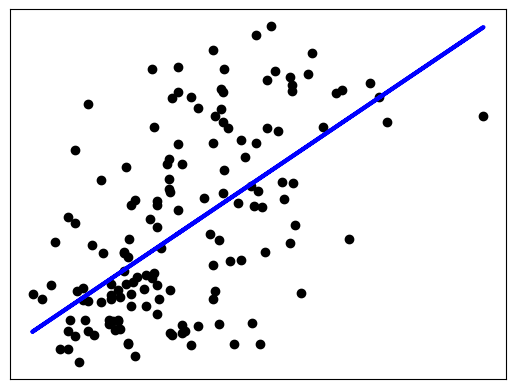

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_Xbmi, diabetes_y, test_size=0.33, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()